## Imports

In [1]:
# Built-in
import os

In [2]:
# Exploratory Data Analysis (Visualizing the data)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
# Local

# Notebook Utilities
# %matplotlib inline

## Functions

In [4]:
def data_seperator(data, depend = None):
    '''Seperates feature types and stores them'''
    # Stores dependant variable
    if depend != None:
        data_depend = data[depend]
        data = data.drop(depend, axis=1)
    else:
        data_depend = []
    
    # Stores categorical features
    select = [data.columns[i] for i in np.where(data.dtypes == 'O')[0]]
    data_categ = pd.DataFrame(data[select])
    
    # Stores all numerical features
    data_num = data.drop(select, axis=1)
    
    # Seperating time features from numerical features
    select = [i for i in data_num.columns if 'year' in i.lower() or 'yr' in i.lower() or 'day' in i or 'week' in i.lower()]
    data_time = pd.DataFrame(data_num[select])
    data_num = data_num.drop(select, axis=1)
    
    # Seperating discrete and continuous features
    select = [feature for feature in data_num if len(data_num[feature].unique()) < 10]
    data_discrete = pd.DataFrame(data_num[select])
    data_continuous = data_num.drop(select, axis=1)
    
    # Returning the features
    return data_num, data_discrete, data_continuous, data_categ, data_time, data_depend

## Dataset Information
A dataset of images containing fruits and vegetables.

The total number of images: 90483.

Training set size: 67692 images (one fruit or vegetable per image).

Test set size: 22688 images (one fruit or vegetable per image).

The number of classes: 131 (fruits and vegetables).

Image size: 100x100 pixels.

Filename format: image_index_100.jpg (e.g. 32_100.jpg) or r_image_index_100.jpg (e.g. r_32_100.jpg) or r2_image_index_100.jpg or r3_image_index_100.jpg. "r" stands for rotated fruit. "r2" means that the fruit was rotated around the 3rd axis. "100" comes from image size (100x100 pixels).

Different varieties of the same fruit (apple for instance) are stored as belonging to different classes.

The dataset can also be downloaded from: [Kaggle](https://www.kaggle.com/moltean/fruits)

Horea Muresan, [Mihai Oltean](https://mihaioltean.github.io), [Fruit recognition from images using deep learning](https://www.researchgate.net/publication/321475443_Fruit_recognition_from_images_using_deep_learning), Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.

MIT License: Copyright (c) 2017-2020 [Mihai Oltean](https://mihaioltean.github.io), Horea Muresan

## Reading Data

In [5]:
train_dir = '../data/raw/train/'
fruits = []
fruits_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(train_dir + i + '/' + image_filename)

In [8]:
data = image_dataset_from_directory(train_dir, image_size=(100, 100))

Found 1474 files belonging to 3 classes.


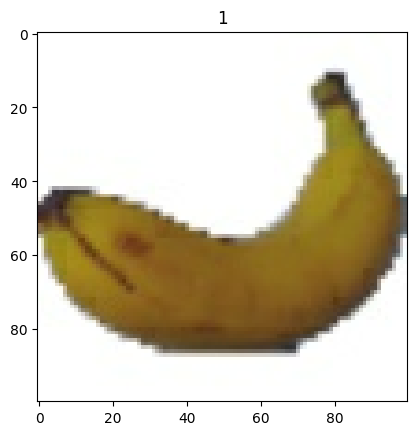

In [58]:
for img, label in data.take(1):
    plt.imshow(img[0].numpy().astype("uint8"))
    plt.title(label[0].numpy())

In [6]:
data = pd.DataFrame(fruits_image, columns=['Image'])
data['Label'] = fruits

In [7]:
data.head()

,Image,Label
0,../data/raw/train/Apple Red 1/0_100.jpg,Apple Red 1
1,../data/raw/train/Apple Red 1/100_100.jpg,Apple Red 1
2,../data/raw/train/Apple Red 1/101_100.jpg,Apple Red 1
3,../data/raw/train/Apple Red 1/102_100.jpg,Apple Red 1
4,../data/raw/train/Apple Red 1/103_100.jpg,Apple Red 1


In [8]:
validation_dir = '../data/raw/validation/'
fruits = []
fruits_image = []
for i in os.listdir(validation_dir):
    for image_filename in os.listdir(validation_dir + i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(validation_dir + i + '/' + image_filename)

In [9]:
v_data = pd.DataFrame(fruits_image, columns=['Image'])
v_data['Label'] = fruits

In [10]:
v_data.head()

,Image,Label
0,../data/raw/validation/Apple Red 1/321_100.jpg,Apple Red 1
1,../data/raw/validation/Apple Red 1/322_100.jpg,Apple Red 1
2,../data/raw/validation/Apple Red 1/323_100.jpg,Apple Red 1
3,../data/raw/validation/Apple Red 1/324_100.jpg,Apple Red 1
4,../data/raw/validation/Apple Red 1/325_100.jpg,Apple Red 1


## Data Images

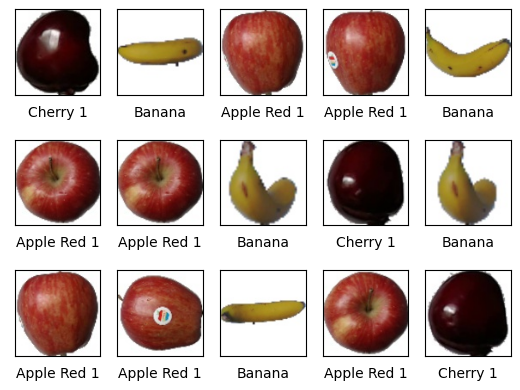

In [18]:
fig = plt.figure()
for i, j in zip(range(15), data.sample(15).index):
    image = plt.imread(data['Image'][j])
    ax = fig.add_subplot(3, 5, i+1)
    plt.xlabel(data['Label'][j])
    plt.xticks([])
    plt.yticks([])
    ax.imshow(image)
plt.show(fig)

(array([492.,   0.,   0.,   0.,   0., 490.,   0.,   0.,   0., 492.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

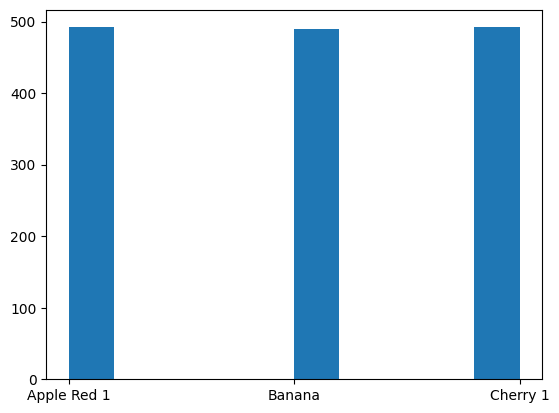

In [21]:
# sns.countplot(x=data['Label'])
plt.hist(data['Label'])

In [ ]:
data['Label'].value_counts()

## Data Info

In [ ]:
data.info()

## Data Description

In [ ]:
data.describe()

In [ ]:
data.to_csv('../data/interim/train.csv', index=False)
v_data.to_csv('../data/interim/validation.csv', index=False)